In [250]:
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

### 1. Exploración y preprocesamiento de datos:
  - Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  - Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.



### **Diccionario de datos:**

Attributes

People

  * ID: Customer's unique identifier
  * Year_Birth: Customer's birth year
  * Education: Customer's education level
  * Marital_Status: Customer's marital status
  * Income: Customer's yearly household income
  * Kidhome: Number of children in customer's household
  * Teenhome: Number of teenagers in customer's household
  * Dt_Customer: Date of customer's enrollment with the company
  * Recency: Number of days since customer's last purchase
  * Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

  * MntWines: Amount spent on wine in last 2 years
  * MntFruits: Amount spent on fruits in last 2 years
  * MntMeatProducts: Amount spent on meat in last 2 years
  * MntFishProducts: Amount spent on fish in last 2 years
  * MntSweetProducts: Amount spent on sweets in last 2 years
  * MntGoldProds: Amount spent on gold in last 2 years

Promotion

  * NumDealsPurchases: Number of purchases made with a discount
  * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

  * NumWebPurchases: Number of purchases made through the company’s website
  * NumCatalogPurchases: Number of purchases made using a catalogue
  * NumStorePurchases: Number of purchases made directly in stores
  * NumWebVisitsMonth: Number of visits to company’s website in the last month


In [225]:
##Cargar los datos
ruta_archivo = '../examen_AML/data/marketing_campaign.csv'
data = pd.read_csv(ruta_archivo, sep = "\t")
df = pd.DataFrame(data)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [226]:
##Exploracion incial
measures = utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurcha

Este dataset cuenta con 2240 filas y 29 columnas que demuestra el analisis de la personalidad de los clientes de una compañia que incluye datos personales de los clientes año de nacimiento, cantidad de hijos, ingresos y sus compatamiento de compras como gastos en productos, compra a traves de promociones y lugares de compras

In [227]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)

Valores faltantes en el dataset
                     datos sin NAs en q  Na en q  Na en %
Income                             2216       24     1.07
ID                                 2240        0     0.00
NumDealsPurchases                  2240        0     0.00
Z_Revenue                          2240        0     0.00
Z_CostContact                      2240        0     0.00
Complain                           2240        0     0.00
AcceptedCmp2                       2240        0     0.00
AcceptedCmp1                       2240        0     0.00
AcceptedCmp5                       2240        0     0.00
AcceptedCmp4                       2240        0     0.00
AcceptedCmp3                       2240        0     0.00
NumWebVisitsMonth                  2240        0     0.00
NumStorePurchases                  2240        0     0.00
NumCatalogPurchases                2240        0     0.00
NumWebPurchases                    2240        0     0.00
MntGoldProds                       2240 

Se puede visualizar que casi no existen valores nulos a excepcion de Income los cuales deben ser imputados para completar los valores, las demas variables no cuentan con valores nulos. Ademas, no se visualizan valores duplicados.

In [228]:
utils.estadisticas_descriptivas(df)

Estadisticas del dataset
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000   

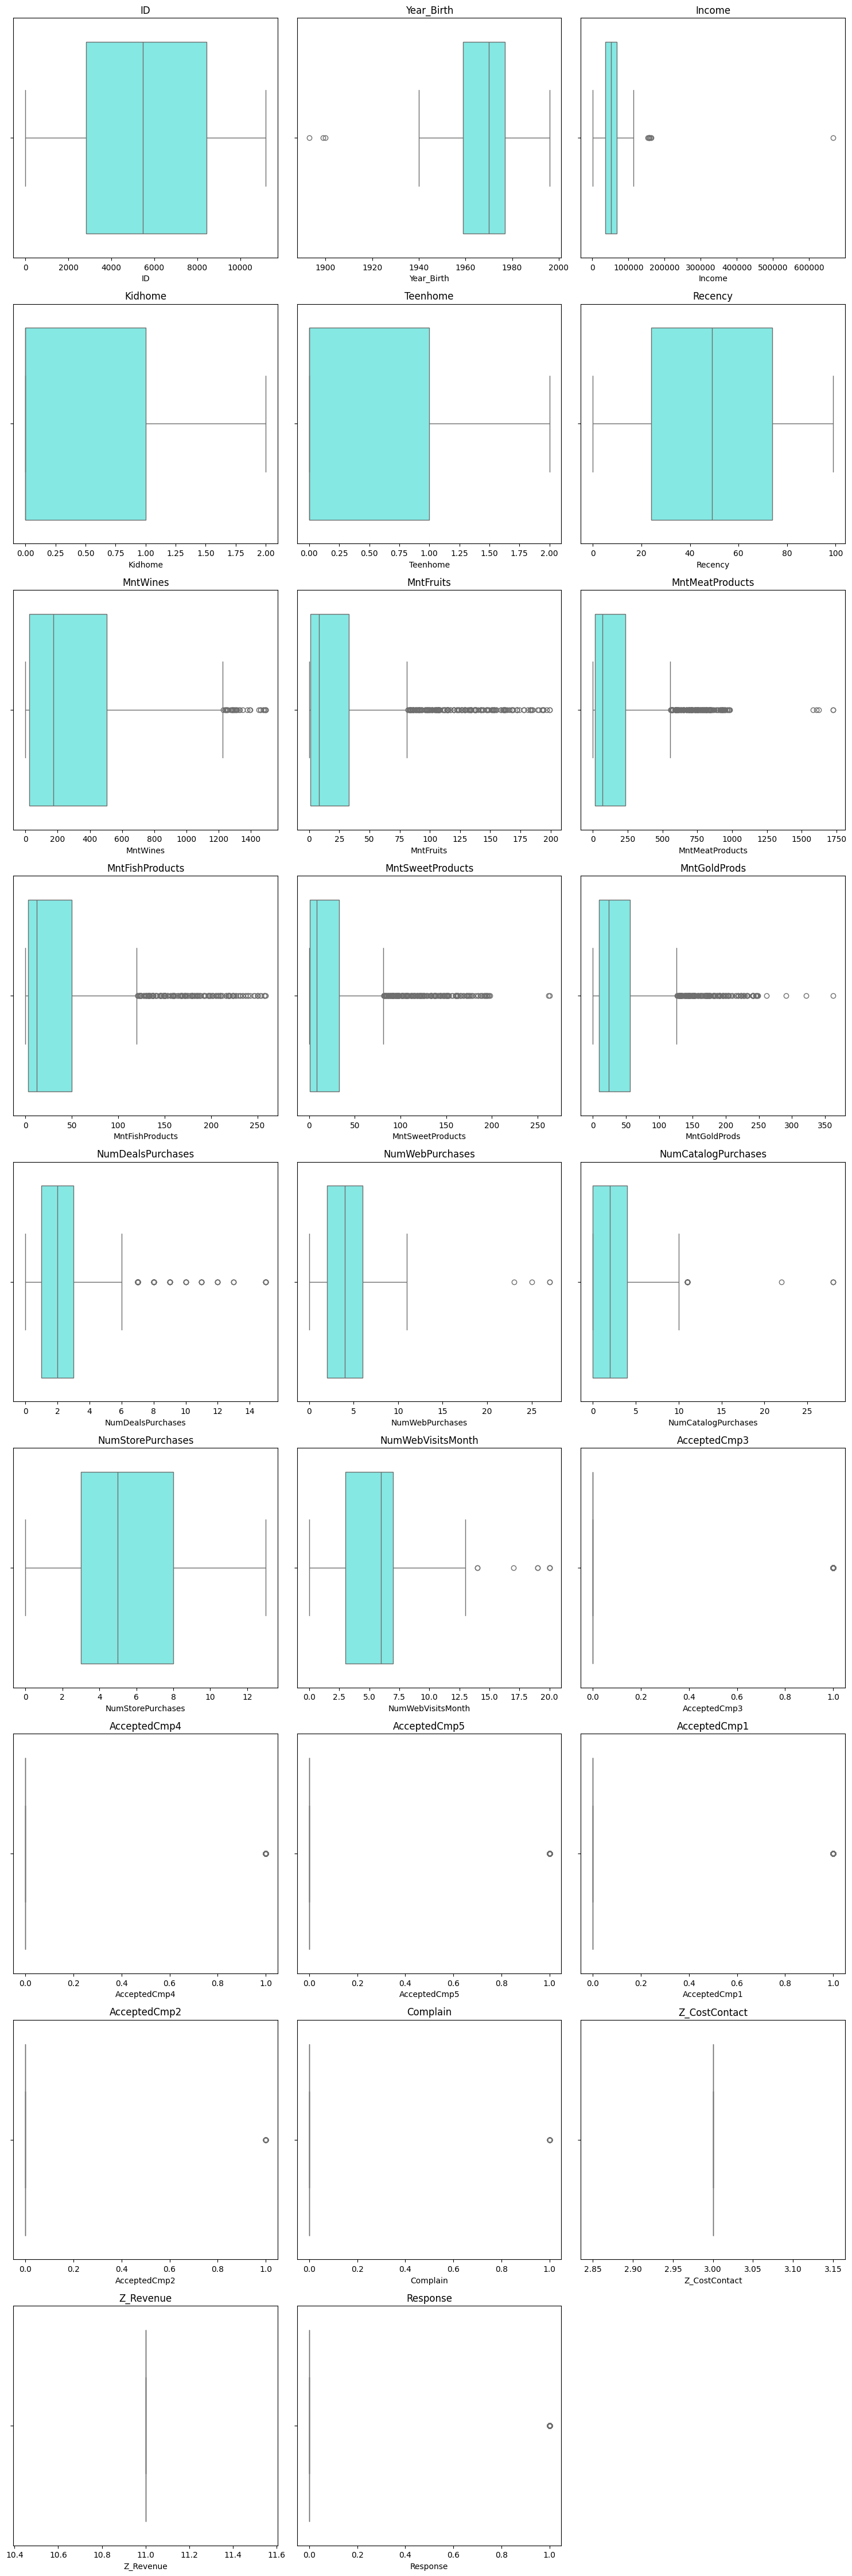

In [229]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,9,3,df)

**Observaciones del boxplot**
* En cuanto a las variables numericas, segun se pueden observar en las estadisticas descriptivas y en el boxplot, muchas variables tienen una distribucion sesgada a la derecha. Esto es particularmente evidente en variables como Income, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts y MntGoldProds. Mientras que NumDealsPurchases y NumWebVisitsMonth, parecen tener una distribución más simétrica.
* Hay una gran cantidad de varibles con outliers, ejemplos comunes incluyen Income, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds y NumWebVisitsMonth.
* Los diagramas de caja muestran diferentes grados de dispersión entre las variables. Por ejemplo, MntWines, MntMeatProducts y MntFishProducts tienen dispersiones relativamente grandes, lo que indica una variabilidad significativa en el gasto en estas categorías de productos.

**Observaciones de las estadisticas descriptivas**

* La moda es a menudo 0 para muchas variables, lo que sugiere que una parte significativa de los clientes no ha comprado ni se ha involucrado con ciertos productos o servicios.
* La desviación estándar proporciona una medida de variabilidad alrededor de la media. Las variables con desviaciones estándar altas, como Income, MntWines, MntMeatProducts y MntFishProducts, indican una mayor dispersión en los datos.
* Las variables relacionadas con la demografía del cliente (por ejemplo, Year_Birth) muestran una variabilidad relativamente baja en comparación con las variables de gasto.
* Las variables relacionadas con las campañas de marketing (AcceptedCmp1, AcceptedCmp2, etc.) tienen valores medios bajos, lo que sugiere que una proporción relativamente pequeña de clientes ha respondido positivamente a estas campañas.

**Para el caso de los outliers al tratarse de datos de compras de clientes, seria importante mantener esta diferencia, por lo que se escala los valores outliers para mantener esta relacion de gastos altos sobre los bajos.**

In [230]:
# Cambiar Dt_Customer a datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# Cambiar el tipo de las columnas a str
df['Education'] = df['Education'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)

# Confirmar el cambio de tipo
print(df[['Education', 'Marital_Status','Dt_Customer']].dtypes)


utils.contar_valores_categoricos(df)


Education                 object
Marital_Status            object
Dt_Customer       datetime64[ns]
dtype: object
Valores únicos en la columna: Education
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: Marital_Status
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
--------------------------------------------------


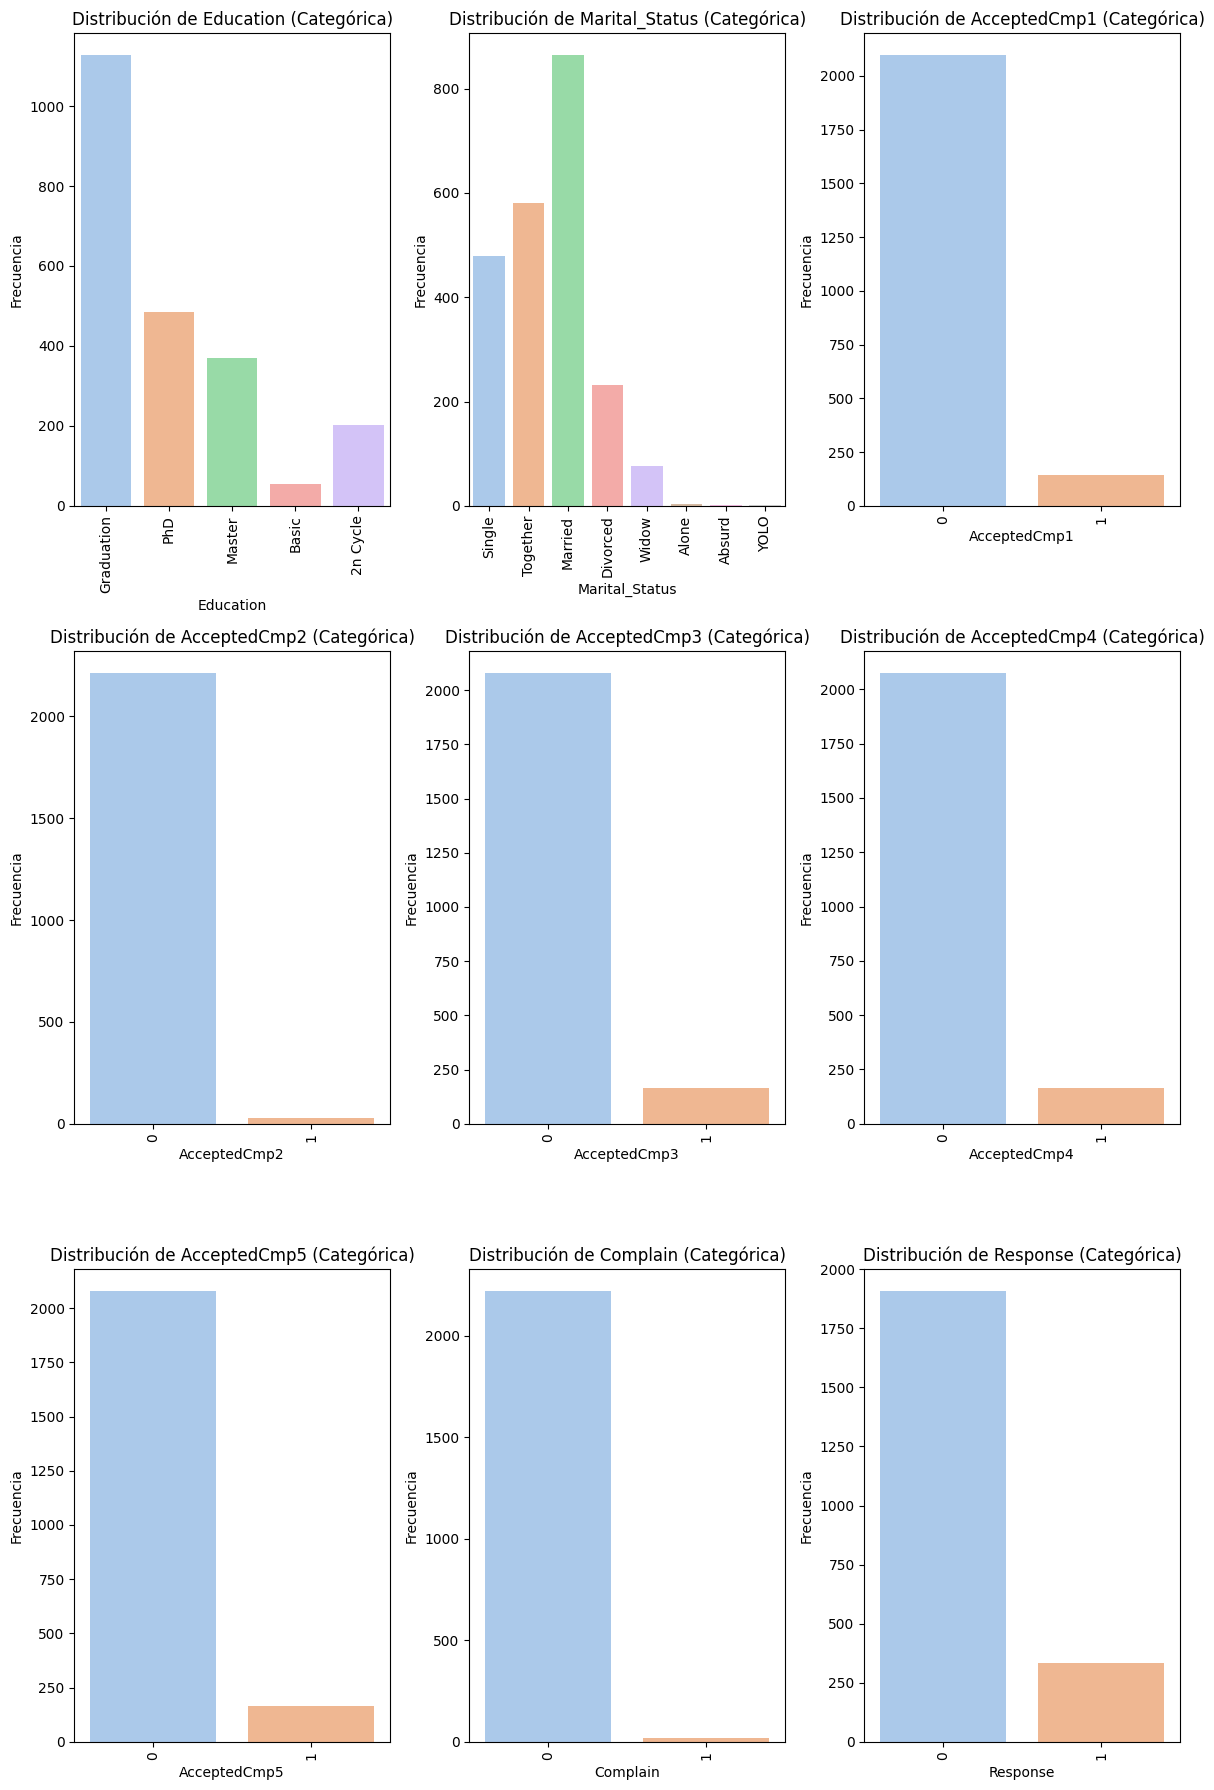

In [231]:
# Variables seleccionadas
selected_columns = ['Education','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response',]

# Llama la función para plotear
utils.plot_selected_variables(df, selected_columns,3,3)

* En el caso de los datos categoricos se puede observar que la educacion de los  clientes muestran una gran mayoria de graduation en comparacion a las demas, seguida de PHD, Master, Sn Cycle y basic. Para el caso de Marital Status, married es el valor mas altos en comparacion a los demas valores seguido de together que muestra que los clientes en su mayoria se encuentran casados; seguidos por single, divoced, widows, para el caso de los demas valores son valores muy bajos que no representan valores significativos en esta muestra.
* Los valores de AceptedCmp, Complian, Response se pueden observar que son mayoritariamente 0 lo que suele ser comunes en este tipo de datos.

In [232]:
### Imputar valores nulos en columna Income
## Debido a que se encuentran valores outliers significativos uqe sesgan a la media considero que mejor imputar los valores con la mediana,
## esto seria bueno para que no afecten la reduccion de dimensionalidad
df['Income'] = df['Income'].fillna(df['Income'].median())
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
ID,2240,0,0.0
NumDealsPurchases,2240,0,0.0
Z_Revenue,2240,0,0.0
Z_CostContact,2240,0,0.0
Complain,2240,0,0.0
AcceptedCmp2,2240,0,0.0
AcceptedCmp1,2240,0,0.0
AcceptedCmp5,2240,0,0.0
AcceptedCmp4,2240,0,0.0
AcceptedCmp3,2240,0,0.0


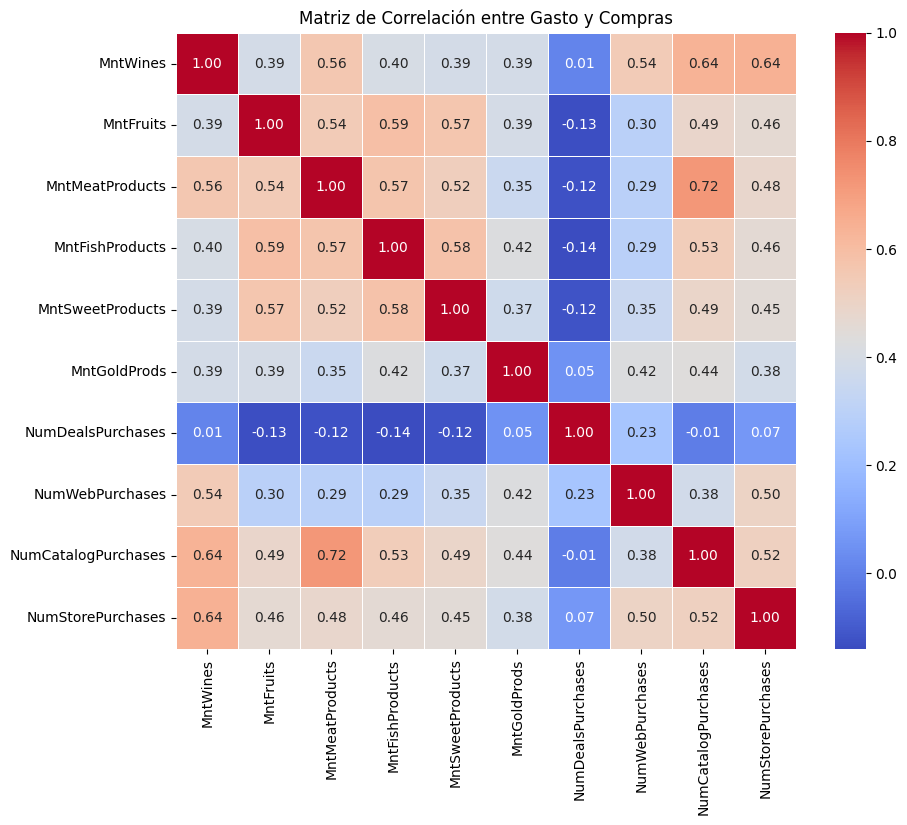

In [233]:
# Selección de columnas de interés
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Subset del DataFrame
df_mnt_num = df[mnt_columns + num_purchase_columns]

# Calcular la matriz de correlación
corr_matrix = df_mnt_num.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Gasto y Compras')
plt.show()

Se puede observar que las personas que gastan más en un tipo de producto (por ejemplo, vinos, carnes o productos dulces) suelen gastar más en otros productos. Esto puede indicar que estos clientes tienen un mayor poder adquisitivo o una mayor frecuencia de compras.

Las compras en tiendas físicas, en línea y a través de catálogos están correlacionadas, lo que puede sugerir que los clientes realizan compras en múltiples canales.

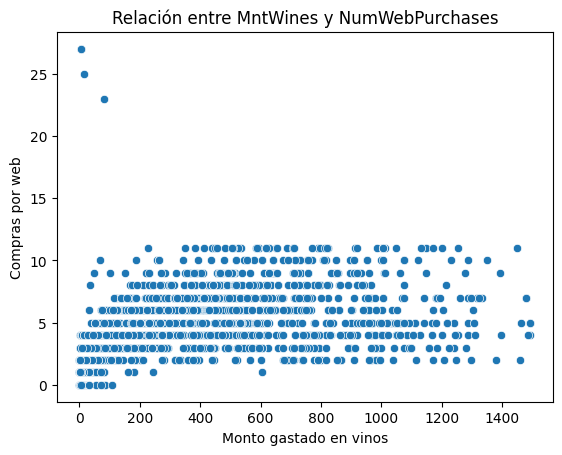

In [234]:
# Crear gráfico de dispersión
sns.scatterplot(data=df, x='MntWines', y='NumWebPurchases')
plt.title('Relación entre MntWines y NumWebPurchases')
plt.xlabel('Monto gastado en vinos')
plt.ylabel('Compras por web')
plt.show()

- Se puede observar que en total, los clientes que gastan más en vinos tienden a realizar más compras por internet. Ésto pudiera indicar que los clientes que compran vino por internet son naturalmente más propensos a realizar compras frecuentes y de mayor valor.
- La dispersión de los datos sugiere que otros factores además del gasto en vinos influyen en el número de compras por internet. Estos factores podrían incluir características demográficas de los clientes, promociones especiales, o la disponibilidad de otros productos en línea.

### 2. Análisis no supervisado:

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

  – K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.

  – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.



In [235]:
##Feature engineering
# One-Hot Encoding para variables categóricas como 'Education' y 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Obtener el año actual
current_year = datetime.now().year

# Crear una nueva columna 'AcceptedAnyCampaign' que indique si aceptaron alguna campaña
df['AcceptedAnyCampaign'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0).astype(int)

# Crear una nueva columna 'Age'
df['Age'] = current_year - df['Year_Birth']

# Eliminar las columnas de las campañas individuales
df = df.drop(columns=['Year_Birth','ID','Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AcceptedAnyCampaign,Age
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,False,0,67
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,False,0,70
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,True,False,False,0,59
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,True,False,False,0,40
4,58293.0,1,0,94,173,43,118,46,27,15,...,True,False,False,True,False,False,False,False,0,43
5,62513.0,0,1,16,520,42,98,0,42,14,...,False,False,False,False,False,True,False,False,0,57
6,55635.0,0,1,34,235,65,164,50,49,27,...,False,False,True,False,False,False,False,False,0,53
7,33454.0,1,0,32,76,10,56,3,1,23,...,True,False,False,True,False,False,False,False,0,39
8,30351.0,1,0,19,14,0,24,3,3,2,...,True,False,False,False,False,True,False,False,0,50
9,5648.0,1,1,68,28,0,6,1,1,13,...,True,False,False,False,False,True,False,False,1,74


Se hace one hot ecoding para los datos categoricos no numericos, ademas se crea nueva columna age y finalmente debido a que la gran mayoria de los datos de AcceptedCmp son 0 los combine en uno solo que dice si acepto al menos una de las campaña por lo que se elimina las demas AcceptedCmp para reducir la dimension.

In [236]:
#Normalizacion de datos
# Selección de variables relevantes para determinar el comportamiento de los clientes
var_select = df[['Income','Age','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Normalización de los datos
scaler = StandardScaler()
V_scaled = scaler.fit_transform(var_select)


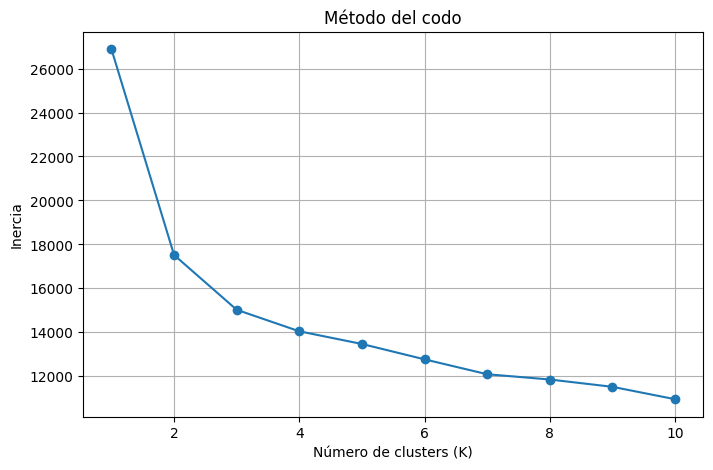

In [237]:
# Evaluación de la inercia para determinar el valor óptimo de K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(V_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

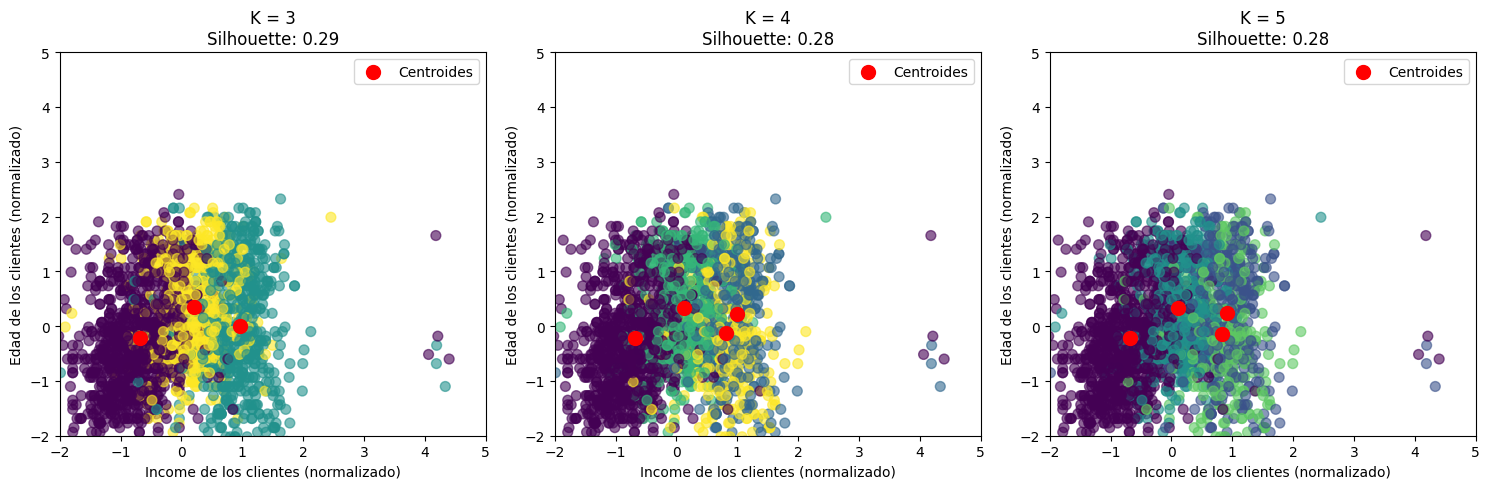

In [238]:
# Valores de K para probar
k_values = [3, 4, 5]

# Configurar la figura
plt.figure(figsize=(15, 5))

# Ajustar límites para ampliar la visualización
x_min, x_max = -2, 5
y_min, y_max = -2, 5

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(V_scaled)
    clusters = kmeans.predict(V_scaled)

    # Cálculo del puntaje de la silueta
    silhouette_avg = silhouette_score(V_scaled, clusters)

    # Visualización de los resultados de clustering
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(V_scaled[:, 0], V_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
    plt.title(f'K = {k}\nSilhouette: {silhouette_avg:.2f}')
    plt.xlabel('Income de los clientes (normalizado)')
    plt.ylabel('Edad de los clientes (normalizado)')
    plt.xlim(x_min, x_max)  # Establecer límites para el eje x
    plt.ylim(y_min, y_max)  # Establecer límites para el eje y
    plt.legend()

plt.tight_layout()
plt.show()

Segun se puede observar tanto en el grafico del codo como en el calculo de silhoette K = 3 parece ser la mejor opcion.
* El grafico del codo muestra una disminucion abrupta entre K 1 y 2 y luego se estabiliza a partir del k =3 lo que sugiere que es el mejor valor para la separacion de datos.
* Para el grafico de silueta, k = 3 tiene un valor de 0.29 y los K 4/5 un puntajo de 0.28, lo que indica que la calidad de los clusters no mejora sustancialmente al aumentar el número de clusters.

### 3. Modelado con MLP:

– Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

– Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

– Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.



In [239]:
df.head()
#df.info()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AcceptedAnyCampaign,Age
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,False,0,67
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,False,0,70
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,True,False,False,0,59
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,True,False,False,0,40
4,58293.0,1,0,94,173,43,118,46,27,15,...,True,False,False,True,False,False,False,False,0,43


In [240]:
# Se selecciona las características para aplicar K-means (Mas importantes para esta clasificacion)
X = df[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases','AcceptedAnyCampaign']]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means con 3 clusters esto de acuerdo a lo que pudimos ver en el analisis mas arriba
kmeans = KMeans(n_clusters=3, random_state=42)
X.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)  # Asignar el número del cluster como una nueva columna

print(X.head())  # Ver las primeras filas para asegurarte de que las etiquetas de los clusters se añadieron

# Seleccionar la variable objetivo (Response) para la clasificación binaria
y = df['Response']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


    Income  Age  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0   67       635         88              546              172   
1  46344.0   70        11          1                6                2   
2  71613.0   59       426         49              127              111   
3  26646.0   40        11          4               20               10   
4  58293.0   43       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  AcceptedAnyCampaign  Cluster  
0                   10                  4 

<ipython-input-240-f6c6f2e2acda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)  # Asignar el número del cluster como una nueva columna


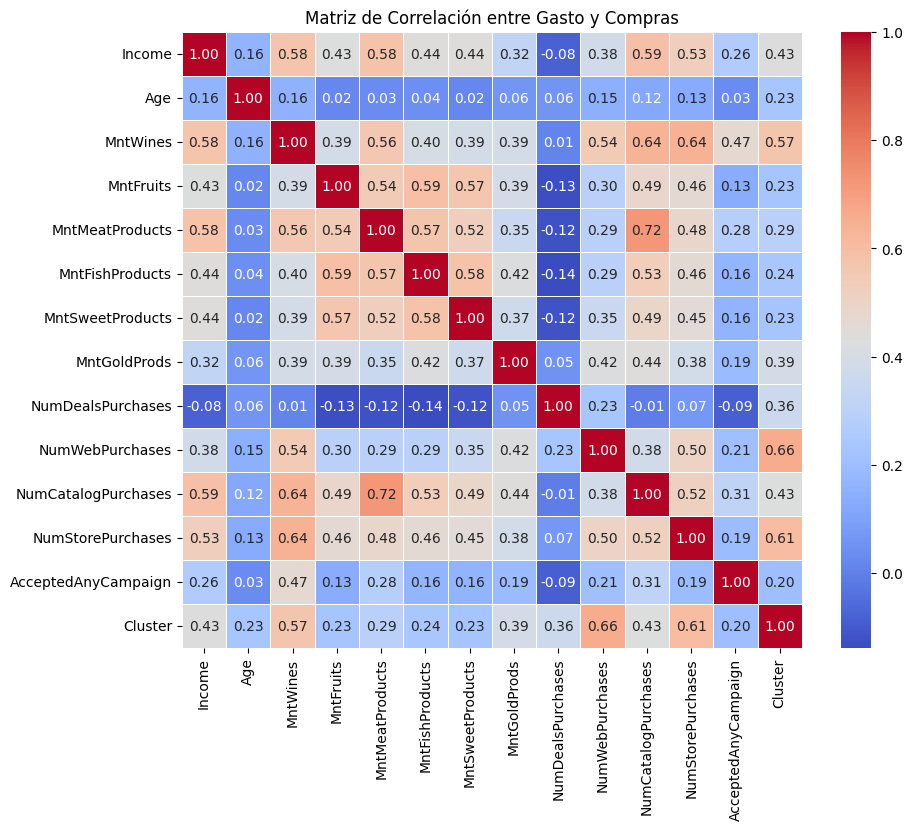

In [253]:
# Subset del DataFrame
df_mnt_num = X

# Calcular la matriz de correlación
corr_matrix = df_mnt_num.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Gasto y Compras')
plt.show()

Nuevo grafico de calor demostrando que el cluster agrega una nueva variable con alra relación con los diferentes componentes.

In [241]:
# Función para crear y entrenar modelos con diferentes configuraciones
#### Este codigo es el mismo que utilizamos en la ultima clase de sesgo y varianza pero modificado para este problema ####

def train_model(config, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=config.get('regularizer')))## Capa de entrada y 1 capa oculta

    if config.get('dropout'):
        model.add(Dropout(config['dropout']))## Capa dropout

    model.add(Dense(32, activation='relu', kernel_regularizer=config.get('regularizer')))#2da capa oculta
    model.add(Dense(1, activation='sigmoid')) # Capa de salida

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])# optimizer, funcion de perdida y metrica

    callbacks = []
    if config.get('early_stopping'):# configuracion de parada temprana
        callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

    history = model.fit( #entrenamiento del modelo
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=500,
        batch_size=16,
        callbacks=callbacks,
        verbose=0
    )
    return model, history

# Configuraciones para los experimentos
configs = {
    'baseline': {},
    'dropout': {'dropout': 0.2},
    'early_stopping': {'early_stopping': True},
    'l2_regularization': {'regularizer': l2(0.01)},
    'l1_regularization': {'regularizer': l1(0.01)}
}

In [242]:
# Entrenar modelos con diferentes configuraciones
models = {}
histories = {}
for name, config in configs.items():
    print(f"Entrenando modelo: {name}")
    model, history = train_model(config, X_train, y_train, X_val, y_val)
    models[name] = model
    histories[name] = history

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando modelo: baseline
Entrenando modelo: dropout


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando modelo: early_stopping


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando modelo: l2_regularization


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando modelo: l1_regularization


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Arquitectura de MLP aplicado para este caso

**Arquitectura del modelo:**

* La capa de entrada recibe los datos relevantes seleccionados dentro dataset de comportamiento de compra de los clientes, esta capa tiene una entrada de 14 atributos 'Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','AcceptedAnyCampaign', 'Cluster'.

  - El ultimo atributo 'cluster' es la resultante de la clusterizacion del dato aplicando K-means con un K = 3, esto para dar una caracteristica con fuerte relacion al dataset.

* Capa oculta 1: Se añade una capa densa con 64 neuronas. Cada una de estas conectadas a las neuronas de entrada. Ademas, cuenta con una funcion de activación Relu, que da la no linealidad en los datos. Finalmente, cuenta con la regularizacion opcional, esto de modo a que el modelo no se sobreajuste a los datos de entrenamiento, estas pueden ser L1 o L2 (ambos probados en esta implementación).

* Capa oculta 2: Esta capa cuenta con una capa densa de 32 neuronas. Al igual que la capa anterior tambien cuenta con una funcion de activación Relu para la no linealidad en los datos y la regularizacion opcional que pueden ser L1 o L2.

* Capa de salida: Esta capa cuenta con 1 neurona que es el que predice finalmente si la probabilidad de que un cliente realice la compra de una categoria especifica de productos.






**Configuraciones del modelo:**

* El modelo se entrena utilizando un optimizador Adam, que ajusta los pesos para minimizar el error durante el entrenamiento.

* Una función de perdida binary_crossentropy que es adecuada para problemas de clasificación binaria.

* El Dropout evita que el modelo se sobreajuste en el entrenamiento "apagando" al azar neuronas en cada paso, lo que mejora la generalización del modelo. Este modelo en particular tiene un dropout de 0.2, lo que significa que el 20% de las neuronas seran "desactivadas" aleatoriamente en cada iteración.

* En la configuracion de early_stopping, se detiene el modelo si no mejora despues de un numero de epocas, lo que evita el sobreajuste y acelera el entrenamiento, para este caso se utiliza el early stopping.

* Regularizaciones L1 y L2: estos añaden penalizaciones adicionales a los pesos de las neuronas para generalizar mejor los datos. Para ambos casos tanto L1 y L2 tienen un valor de 0.01 que penaliza los pesos con valor relativamente pequeño, evitando que crezcan demasiado, pero sin ser tan fuertes para afectar el aprendizaje del modelo.






### 4. Evaluación del modelo:
– Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.

– Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.



In [251]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"Resultados para el modelo {name}:")
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))
    print("-" * 50)

Resultados para el modelo baseline:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
              precision    recall  f1-score   support

     Clase 0       0.85      1.00      0.92       572
     Clase 1       0.00      0.00      0.00       100

    accuracy                           0.85       672
   macro avg       0.43      0.50      0.46       672
weighted avg       0.72      0.85      0.78       672

--------------------------------------------------
Resultados para el modelo dropout:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

     Clase 0       0.85      1.00      0.92       572
     Clase 1       0.00      0.00      0.00       100

    accuracy                           0.85       672
   macro avg       0.43      0.50      0.46       672
weighted avg       0.72      0.85      0.78       672

--------------------------------------------------
Resultados para el modelo early_stopping:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

     Clase 0       0.89      0.93      0.91       572
     Clase 1       0.46      0.32      0.38       100

    accuracy                           0.84       672
   macro avg       0.67      0.63      0.64       672
weighted avg       0.82      0.84      0.83       672

--------------------------------------------------
Resultados para el modelo l2_regularization:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

     Clase 0       0.85      1.00      0.92       572
     Clase 1       0.00      0.00      0.00       100

    accuracy                           0.85       672
   macro avg       0.43      0.50      0.46       672
weighted avg       0.72      0.85      0.78       672

--------------------------------------------------
Resultados para el modelo l1_regularization:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
              precision    recall  f1-score   support

     Clase 0      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


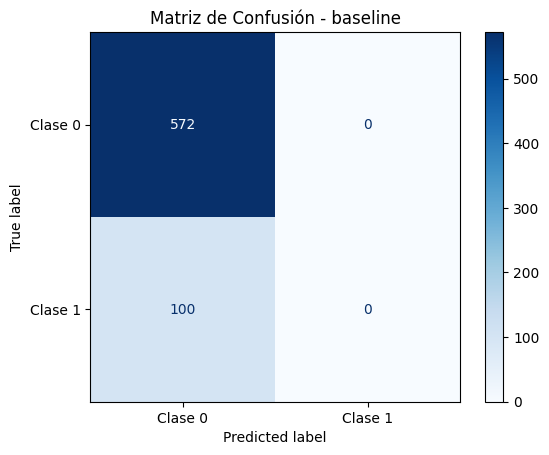

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


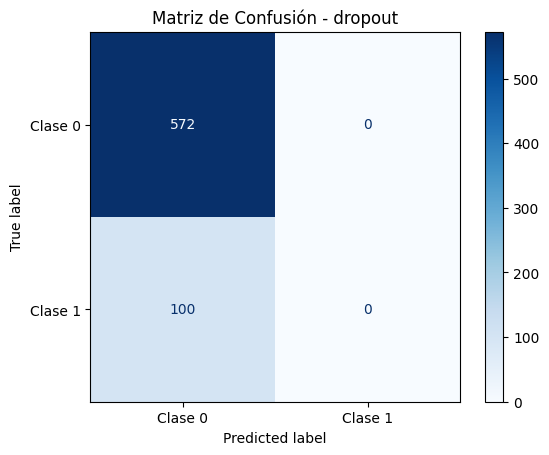

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


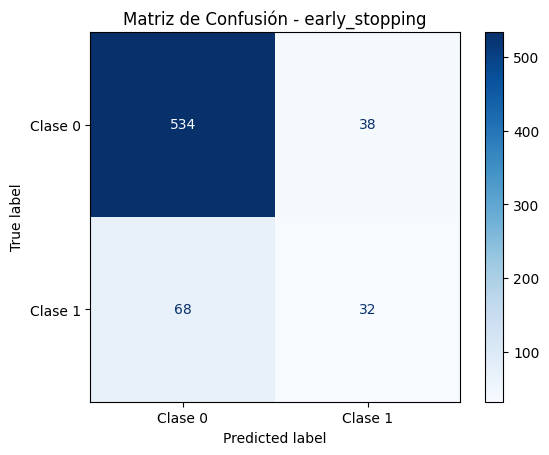

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


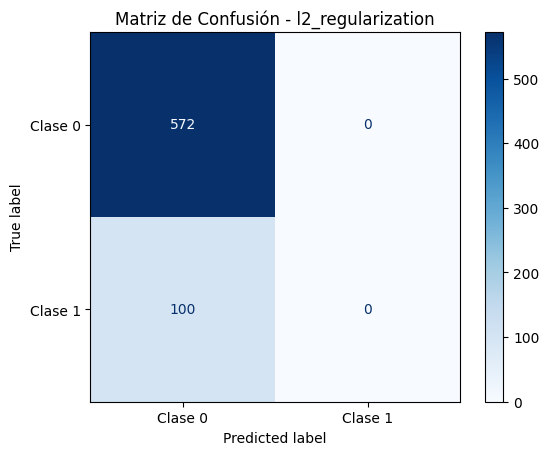

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


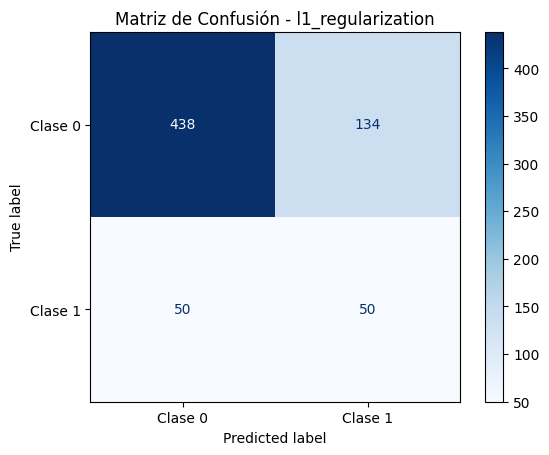

In [246]:
for name, model in models.items():
    # Predicción binaria (umbral de 0.5)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_true = y_test.astype("int32")

    # Mostrar la matriz de confusión
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', display_labels=["Clase 0", "Clase 1"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

### Conclusion de acuerdo a los matrices de confusion y resultados del reporte de clasificación:

* Se pueden observar que los modelos Baseline, dropout y L2 no tuvieron buen resultado generalizando el modelo, ya que este dataset se encuentra desbalanceado y sesgado para la clase 0 que lo detecta en un 100% y la clase 1 en un 0%. Sin ambargo, se puede observar que estos modelos tienen un mejor accuracy con un 0.85, que podemos decir no representan una real metrica para este caso. Por lo tanto, no serian buenos modelos a ser aplicados en este caso, pero sirven de base para medición de otros modelos.

* Para el caso del modelo aplicando early stopping, podemos ver una mejoria considerable en la generalizacion de las predicciones con un accuracy de 0.84, teniendo una prediccion segun la matriz de confusion para la clase 0 de 93% y clase 1 de 32% del total.

* Finalmente, el modelo con regularización L1 fue el que obtuvo mejor resultado con una prediccion de Clase 0 de 76.5% y para la Clase 1 de 50%. Sin embargo, se puede observar un accuracy del 0.73 el cual seria el menor de entre los demas modelos, pero esto se podría deber a que generaliza mejor el modelo sacrificado el accuracy para este caso.

En conlusion, podemos decir que de entre todos los modelos el modelo con regularización L1 fue el que mejor resultado obtuvo seguido por el modelo configurado con early stopping y finalmente los otros modelos que no tuvieron exito en generalizar los datos pero ayudan como modelos base para las mediciones.

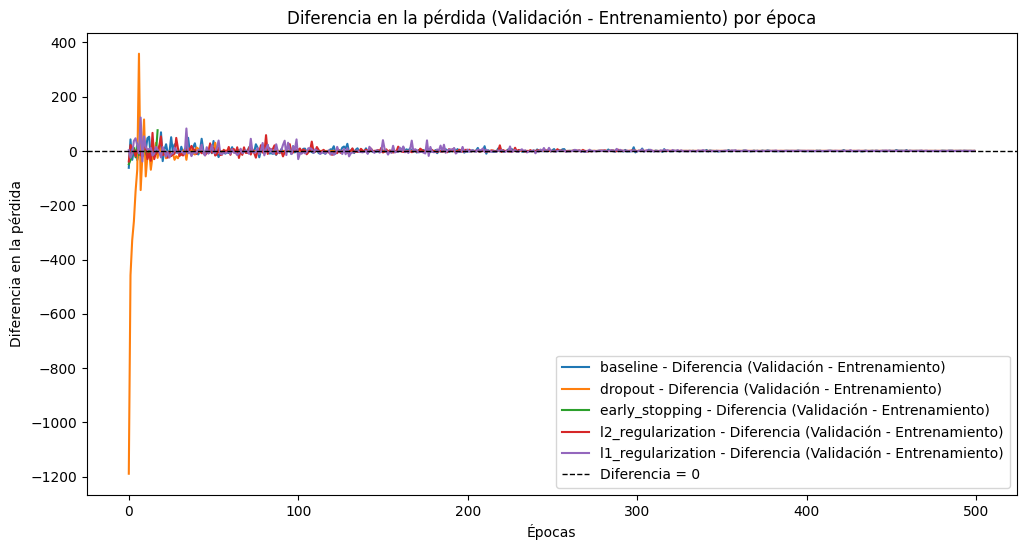

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


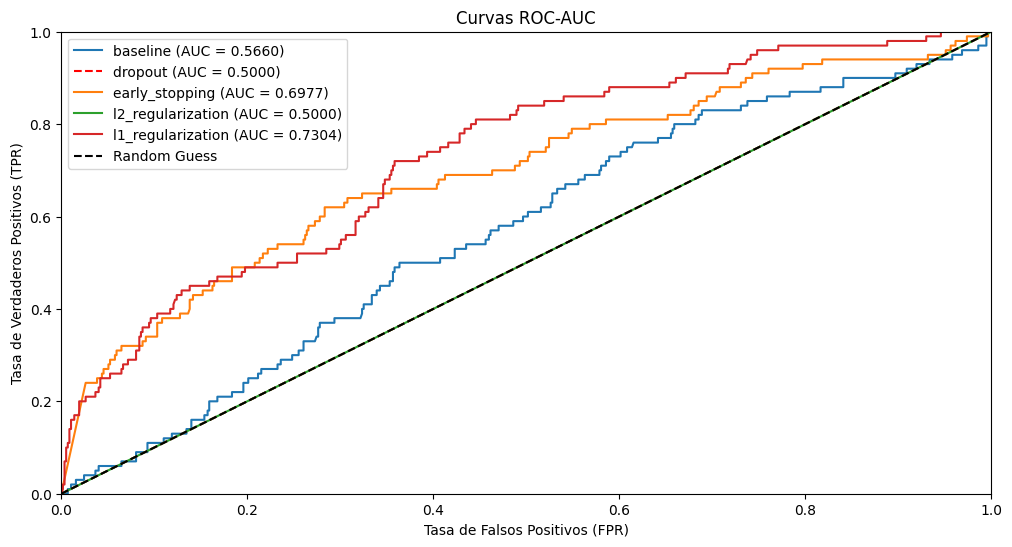

In [252]:
# Graficar la diferencia en la pérdida entre entrenamiento y validación por época
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    difference = np.array(validation_loss) - np.array(training_loss)
    plt.plot(difference, label=f"{name} - Diferencia (Validación - Entrenamiento)")

plt.axhline(0, color='k', linestyle='--', linewidth=1, label="Diferencia = 0")
plt.title("Diferencia en la pérdida (Validación - Entrenamiento) por época")
plt.xlabel("Épocas")
plt.ylabel("Diferencia en la pérdida")
plt.legend()
plt.show()

# Graficar curvas ROC-AUC
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_pred_prob = model.predict(X_test)  # Probabilidad para la clase positiva en clasificación binaria
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Ajustar los límites de los ejes si es necesario
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Personalizar los estilos de línea y colores
    if name == 'dropout':
        plt.plot(fpr, tpr, color='red', linestyle='--', label=f"{name} (AUC = {roc_auc:.4f})")
    elif name == 'L2 regularization':
        plt.plot(fpr, tpr, color='green', linestyle=':', label=f"{name} (AUC = {roc_auc:.4f})")
    else:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Curvas ROC-AUC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()


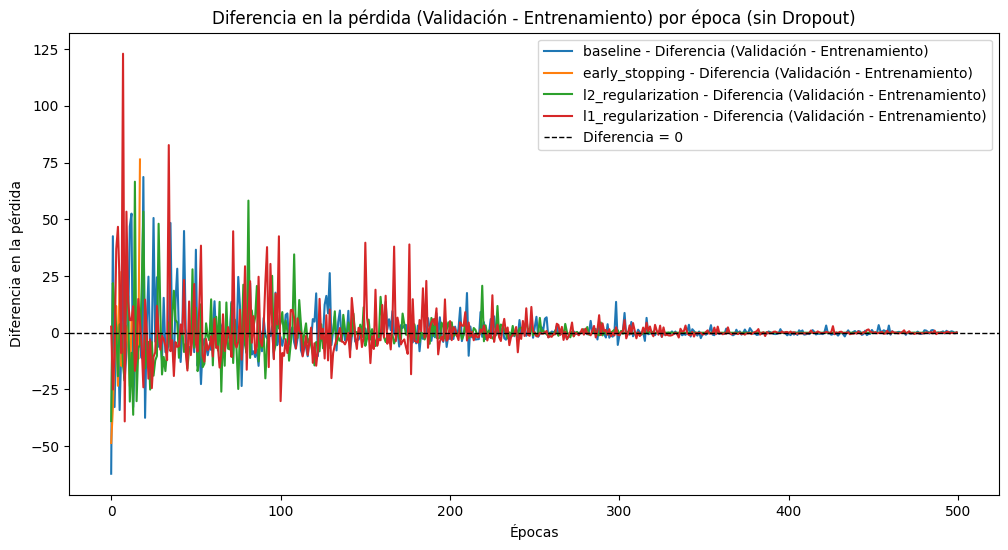

In [248]:
#Debido a que el modelo de dropout tuvo una perdida considerable no permite ver a detalle los demas resultados, por lo que se imprime este grafico
#obviando el modelo de dropout

# Graficar la diferencia en la pérdida entre entrenamiento y validación por época
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    # Excluir el modelo con 'dropout' de la visualización
    if 'dropout' not in name:
        training_loss = history.history['loss']
        validation_loss = history.history['val_loss']
        difference = np.array(validation_loss) - np.array(training_loss)
        plt.plot(difference, label=f"{name} - Diferencia (Validación - Entrenamiento)")

plt.axhline(0, color='k', linestyle='--', linewidth=1, label="Diferencia = 0")
plt.title("Diferencia en la pérdida (Validación - Entrenamiento) por época (sin Dropout)")
plt.xlabel("Épocas")
plt.ylabel("Diferencia en la pérdida")
plt.legend()
plt.show()


### Resumen de resultados:

**Curva ROC - AUC:**

* Regularizacion L1: Este modelo se pocisiona como el mejor modelo, demostrando una capacidad para distinguir entre las clases 0 y 1. Esto indica que la penalización de los coeficientes grandes han sido efectivas en prevenir el sobreajuste y mejorar la generalización del modelo.

* Early Stopping: También muestra tener un buen rendimiento por debajo de modelo con regularización L1, lo que sugiere que detener el entrenamiento en el momento preciso ayuda a evitar el sobreajuste.

* Baseline y L2 Regularization: Estos modelos presentan un rendimiento inferior e incluso peor que una clasificación aleatoria. Por lo tanto se pueden concluir que no son modelos efectivos para esta predicción.

**Grafico de evolución de perdida:**

* En general, todos los modelos parecen converger a una diferencia de pérdida cercana a 0, lo que indica que alcanzan un equilibrio entre el entrenamiento y la validación.

* Sin embargo, se puede observar algunas fluctuaciones de perdida, especialmente en las primeras epocas, mas visible para el caso de dropout.

* Aunque no es tan evidente, se puede ver que el modelo de regularización L1 tiene una clara ventaja sobre los demas modelos en terminos de evolución de la perdida, este mismo resultado puede ser confirmado por la curva ROC-AUC donde se ve una superioridad clara.


### 5. Discusión y análisis:
– Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

– Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?



**Reflexiones sobre el analisis no supervisado:**

1. Número óptimo de clusters: El método del codo y el coeficiente de
silueta sugieren que el número óptimo de clusters es 3. Esto indica que los clientes pueden ser segmentados en tres grupos principales con características y comportamientos distintivos.

2. Interpretación de los cluster, segun lo que se observa en el grafico de clusters:
* Cluster 1: Probablemente corresponde a clientes de mayor edad con un ingreso moderado y un gasto concentrado en productos básicos (vino, carne). Podrían ser clientes más tradicionales y menos influenciables por las promociones.
* Cluster 2: Podría representar a clientes jóvenes con un ingreso alto y un gasto diversificado en diferentes categorías de productos. Estos clientes son más propensos a probar nuevos productos y a ser influenciados por promociones.
* Cluster 3: Podría corresponder a clientes con un ingreso bajo y un gasto limitado. Estos clientes son más sensibles al precio y buscan ofertas.

**Reflexiones sobre el analisis de Modelos MLP:**

* Regularización L1: Los resultados de los modelos MLP indican que la regularización L1 ha sido la técnica más efectiva para mejorar el rendimiento del modelo. Esto sugiere que el modelo ha identificado las características más relevantes para la clasificación.
* Curvas ROC-AUC: Las curvas ROC-AUC muestran que el modelo con regularización L1 tiene una mayor capacidad para distinguir entre las clases positivas y negativas, lo que indica una mejor capacidad de predicción.
* Evolución de la pérdida: La evolución de la pérdida a lo largo de las épocas sugiere que el modelo ha convergido y no está sobreajustando los datos. Ademas, este grafico muestra una ventaja en terminos de evolución de la perdida del modelo de regularización L1 sobre los demas modelos.

**Discusión del redimiento de los diferentes modelos MLP utilizados en este caso:**

* Desempeño General: Los modelos baseline, dropout y L2 regularization muestran un rendimiento muy pobre, con una precisión y recall cercanos a cero para la clase 1. Esto sugiere un problema de desequilibrio de clases, donde la clase 0 (mayoritaria) está siendo sesgada en las predicciones.

* Early Stopping: Muestra una mejora significativa en comparación con los otros modelos, con una precisión y recall más altos para la clase 1. Esto indica que detener el entrenamiento antes de que el modelo comience a sobreajustarse es crucial en este caso.

* L1 Regularization: También muestra una mejora en el recall de la clase 1, aunque la precisión aún es relativamente baja. Esto sugiere que la regularización L1 ha ayudado a reducir el sobreajuste y mejorar la capacidad del modelo para identificar correctamente los casos positivos de la clase 1.

* Fluctuaciones grafico de perdida: Las fluctuaciones en la pérdida sugieren que el entrenamiento no es estable y que el modelo podría estar sobreajustando.
En principio, los MLP pueden ser adecuados para este tipo de datos, ya que pueden aprender relaciones no lineales entre las variables. Sin embargo, el desequilibrio de clases y la posible complejidad de las relaciones en el dataset pueden estar afectando el rendimiento.

**Opciones para mejoramiento del rendimiento del Modelo MLP:**

* Equilibrar los datos: Esto se puede lograr mediante sobremuestreo (duplicar ejemplos de la clase minoritaria o crear datos sinteticos mediante metodos como SMOTE), submuestreo (eliminar ejemplos de la clase mayoritaria) o asignando pesos diferentes a las clases durante el entrenamiento (cost-sensitive learning).

* Optimizar los hiperparámetros: Ajustar cuidadosamente la tasa de aprendizaje, el número de capas ocultas y neuronas, y los parámetros de regularización para encontrar la mejor configuración del modelo, se podrían utilizar metodos de optimización de parametros como Grid Search o Random Search.

* Ingeniería de características: Crear nuevas características relevantes a partir de las existentes y seleccionar las más importantes para mejorar la capacidad predictiva del modelo.

* Considerar otras técnicas: Explorar técnicas como el aprendizaje conjunto y modelos basados en árboles, que pueden ser más robustos al desequilibrio de clases.